<a href="https://colab.research.google.com/github/cutepuppy2024/Co_Lab_upload/blob/main/0607_vision_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
# tensor 생성
x = torch.tensor([1., 2., 3.])
print(x)
if torch.cuda.is_available():
    x = x.to('cuda') # 자동 GPU로
    print('Able to use!')
    print(x)
else:
    print('unable!')

tensor([1., 2., 3.])
Able to use!
tensor([1., 2., 3.], device='cuda:0')


In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
# 전처리 과정
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])
# 데이터셋 로딩
train = torchvision.datasets.MNIST(root='/content/mydrive/MyDrive/Colab Notebooks', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
test = torchvision.datasets.MNIST(root='/content/mydrive/MyDrive/Colab Notebooks', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5470085.26it/s] 


Extracting /content/mydrive/MyDrive/Colab Notebooks/MNIST/raw/train-images-idx3-ubyte.gz to /content/mydrive/MyDrive/Colab Notebooks/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 162318.49it/s]


Extracting /content/mydrive/MyDrive/Colab Notebooks/MNIST/raw/train-labels-idx1-ubyte.gz to /content/mydrive/MyDrive/Colab Notebooks/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1508681.25it/s]


Extracting /content/mydrive/MyDrive/Colab Notebooks/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/mydrive/MyDrive/Colab Notebooks/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5348267.48it/s]


Extracting /content/mydrive/MyDrive/Colab Notebooks/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/mydrive/MyDrive/Colab Notebooks/MNIST/raw



신경망 모델

In [ ]:
import torch.nn as nn
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.conv1 = nn.Conv2d(1,6,5) # 1: 입력채널, 6: 출력채널, 5: 커널(필터) 크기
    self.pool = nn.MaxPool2d(2,2) # 2: 커널크기, 2: 스트라이드(보폭)
    self.conv2 = nn.Conv2d(6,16,5) # 6: 입력채널(1층의 출력) 16: 출력채널, 5: 커널크기
    self.fc1 = nn.Linear(16*4*4, 120) # 16*4*4 : 입력/ 데이터 처리하여 이 수만큼 출임, 120: 출력
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x =self.pool(torch.relu(self.conv1(x))) # relu통과 후 pool
    x =self.pool(torch.relu(self.conv2(x)))
    x = x.view(-1, 16*4*4) # flatten
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x

모델생성

In [ ]:
net = SimpleCNN().to('cuda') # 다른 모델을 가지고 와서 전이학습 가능

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [ ]:
num_epochs = 5
train_val_loss = []
val_loss_values = []

# 훈련
for epoch in range(num_epochs):
  running_loss = 0.0
  net.train() # 모델을 학습모델로 변경
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    inputs, labels = inputs.to('cuda'),labels.to('cuda')
    optimizer.zero_grad() # loop를 돌때, 모든 변화율(gradient)을 0으로 초기
    outputs = net(inputs) # 순전파

    loss = criterion(outputs, labels) # 손실함수 계산
    loss.backward() # 역전파
    optimizer.step() # 변화율을 사용하여 가중치 업데이트

    running_loss += loss.item()
    if i %  100 == 99: # 100번째 미니배치마다 손실 출력
      train_val_loss.append(running_loss/100)
      print(f'Epoch {epoch+1}, Batch {i+1} : Train Loss :{running_loss/100}')
      running_loss = 0.0


# 검증손실계산
  net.eval() # 모델을 평가 모델로 변경
  val_loss = 0.0
  with torch.no_grad():
    for data in test_loader:
      inputs, labels = data
      inputs, labels = inputs.to('cuda'), labels.to('cuda')
      outputs =net(inputs)
      loss = criterion(outputs, labels)
      val_loss += loss.item()

    val_loss /= len(test_loader)
    val_loss_values.append(val_loss)
    print(f"Epoch {epoch+1} : Validation Loss : {val_loss}")

print('Finish!')

Epoch 1, Batch 100 : Train Loss :0.6178224058449269
Epoch 1, Batch 200 : Train Loss :0.1605663211271167
Epoch 1, Batch 300 : Train Loss :0.1437875332683325
Epoch 1, Batch 400 : Train Loss :0.12311961703002453
Epoch 1, Batch 500 : Train Loss :0.11867801672313362
Epoch 1, Batch 600 : Train Loss :0.10377448798622936
Epoch 1, Batch 700 : Train Loss :0.11836572447326034
Epoch 1, Batch 800 : Train Loss :0.11768622701056301
Epoch 1, Batch 900 : Train Loss :0.09724395226221531
Epoch 1 : Validation Loss : 0.09201437733351152
Epoch 2, Batch 100 : Train Loss :0.08143850146792829
Epoch 2, Batch 200 : Train Loss :0.08540106930217008
Epoch 2, Batch 300 : Train Loss :0.09152967622736469
Epoch 2, Batch 400 : Train Loss :0.09463399999774992
Epoch 2, Batch 500 : Train Loss :0.09614311678131343
Epoch 2, Batch 600 : Train Loss :0.08690944614994806
Epoch 2, Batch 700 : Train Loss :0.08025075361132622
Epoch 2, Batch 800 : Train Loss :0.07689808502036613
Epoch 2, Batch 900 : Train Loss :0.08303595732781105
E

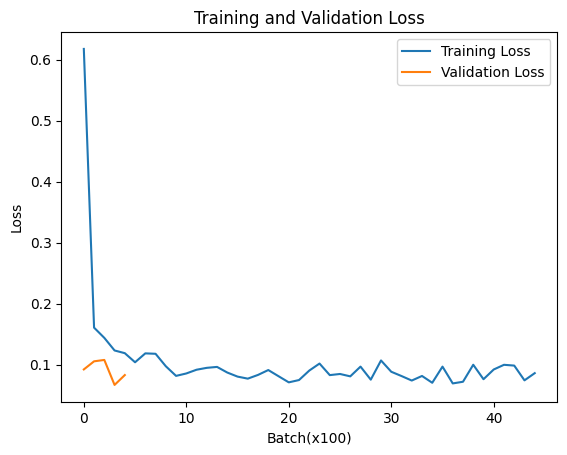

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_val_loss, label ='Training Loss')
plt.plot(val_loss_values, label='Validation Loss') # epoch당 1번씩 validation 했기 때문에 그래프가 짧다
plt.xlabel('Batch(x100)')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np

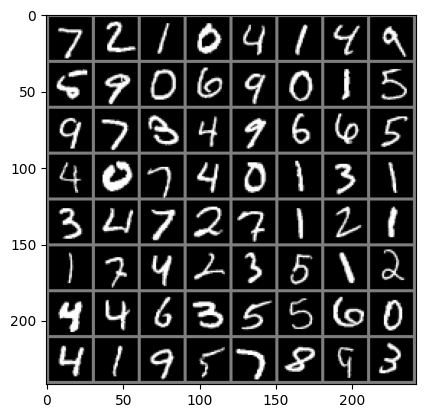

Predicted : 1 2 3 4 5 6 7 8
Ground Truth: 7 2 1 0 4 1 4 9


In [ ]:
def imshow(img):
  img = img /2 + 0.5 # 역정규화
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

# 테스트 데이터 예측
dataiter = iter(test_loader)
images, labels = next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images))

# 예측 출력
images, lagels = images.to('cuda'), labels.to('cuda')
outpus = net(images)
_, predicted = torch.max(outputs, 1)

# 예측 결과와 실제 레이블 출력
print('Predicted :', ' '.join(f"{predicted[j].item()}" for j in range(8)))
print('Ground Truth:', ' '.join(f"{labels[j].item()}" for j in range(8)))